In [1]:
#先加载后续分箱需要用到的包和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision',3)

In [2]:
df = pd.read_csv("cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0
1,2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0
2,3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0
3,4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0
4,5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0


In [3]:
mapDict = {"Unnamed: 0":"用户ID",
        "SeriousDlqin2yrs":"好坏客户",
        "RevolvingUtilizationOfUnsecuredLines":"可用额度比值", #
        "age":"年龄",
        "NumberOfTime30-59DaysPastDueNotWorse":"逾期30-59天笔数",
        "DebtRatio":"负债率",
        "MonthlyIncome":"月收入",
        "NumberOfOpenCreditLinesAndLoans":"信贷数量",
        "NumberOfTimes90DaysLate":"逾期90天笔数",
        "NumberRealEstateLoansOrLines":"固定资产贷款量",
        "NumberOfTime60-89DaysPastDueNotWorse":"逾期60-89天笔数",
        "NumberOfDependents":"家属数量"}
df.rename(columns=mapDict,inplace=True)
df.head()

,用户ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0
1,2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0
2,3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0
3,4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0
4,5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   用户ID        150000 non-null  int64  
 1   好坏客户        150000 non-null  int64  
 2   可用额度比值      150000 non-null  float64
 3   年龄          150000 non-null  int64  
 4   逾期30-59天笔数  150000 non-null  int64  
 5   负债率         150000 non-null  float64
 6   月收入         120269 non-null  float64
 7   信贷数量        150000 non-null  int64  
 8   逾期90天笔数     150000 non-null  int64  
 9   固定资产贷款量     150000 non-null  int64  
 10  逾期60-89天笔数  150000 non-null  int64  
 11  家属数量        146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
df.isna().sum() / df.shape[0]

用户ID          0.000
好坏客户          0.000
可用额度比值        0.000
年龄            0.000
逾期30-59天笔数    0.000
负债率           0.000
月收入           0.198
信贷数量          0.000
逾期90天笔数       0.000
固定资产贷款量       0.000
逾期60-89天笔数    0.000
家属数量          0.026
dtype: float64

In [6]:
#数据中‘月收入’的缺失值过多，我们利用均值来进行缺失值的填补工作
fillnaDict = {'月收入':df['月收入'].mean(),'家属数量':df['家属数量'].mode()[0]}
df = df.fillna(value=fillnaDict)
df1 = df.drop_duplicates()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   用户ID        150000 non-null  int64  
 1   好坏客户        150000 non-null  int64  
 2   可用额度比值      150000 non-null  float64
 3   年龄          150000 non-null  int64  
 4   逾期30-59天笔数  150000 non-null  int64  
 5   负债率         150000 non-null  float64
 6   月收入         150000 non-null  float64
 7   信贷数量        150000 non-null  int64  
 8   逾期90天笔数     150000 non-null  int64  
 9   固定资产贷款量     150000 non-null  int64  
 10  逾期60-89天笔数  150000 non-null  int64  
 11  家属数量        150000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 14.9 MB


In [8]:
df1.head()

,用户ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0
1,2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0
2,3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0
3,4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0
4,5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0


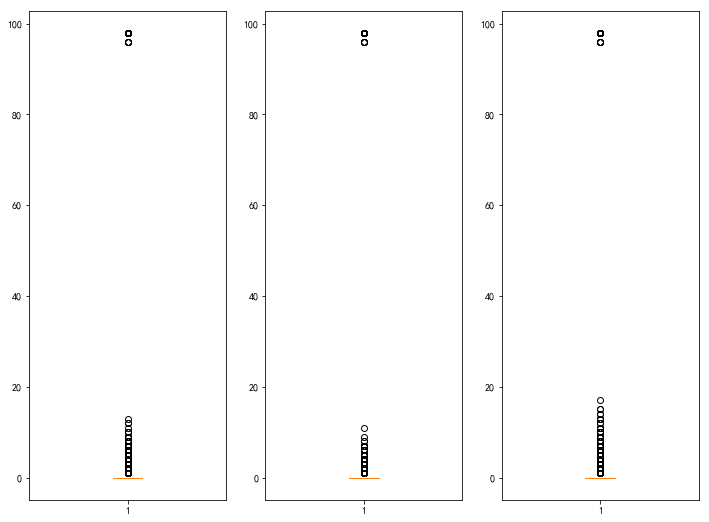

In [9]:
#利用箱型图对特征进行可视化来检测异常数据。
#设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
#设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False
cols = ['逾期30-59天笔数','逾期60-89天笔数','逾期90天笔数']
fig,axs = plt.subplots(1,3,figsize=(12,9))
for ax,col in zip(axs,cols):
    ax.boxplot(df1[col])
#     ax.set_xticklabels(col)
plt.show()

In [10]:
#通过以上特征可视化我们可以对明显偏离的样本，比如年龄为0，或是逾期次数过高进行盖帽或者是删除操作，这里采用直接删除
#按条件对异常值过滤
# condition = "可用额度比值 <= 1 and 年龄 >0 and 逾期30-59天笔数 < 80 and 固定资产贷款量 < 50"
# df1 = df1.query(condition)
cdt1 = df1['可用额度比值'] <= 1
cdt2 = df1['年龄'] > 0                 
cdt3 = df1['逾期30-59天笔数'] < 80
cdt4 = df1['固定资产贷款量'] < 50
df1 = df1[cdt1 & cdt2 & cdt3 & cdt4]
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146408 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   用户ID        146408 non-null  int64  
 1   好坏客户        146408 non-null  int64  
 2   可用额度比值      146408 non-null  float64
 3   年龄          146408 non-null  int64  
 4   逾期30-59天笔数  146408 non-null  int64  
 5   负债率         146408 non-null  float64
 6   月收入         146408 non-null  float64
 7   信贷数量        146408 non-null  int64  
 8   逾期90天笔数     146408 non-null  int64  
 9   固定资产贷款量     146408 non-null  int64  
 10  逾期60-89天笔数  146408 non-null  int64  
 11  家属数量        146408 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 14.5 MB


In [11]:
cut_bins = [0,5000,10000,15000,20000,100000]
month_cut = pd.cut(df1['月收入'],cut_bins)
month_cut_group = df1['好坏客户'].groupby(month_cut).count().to_frame()
month_cut_group1 = df1["好坏客户"].groupby(month_cut).sum().to_frame()
df3 = pd.merge(month_cut_group,month_cut_group1,left_index=True,right_index=True)
df3.rename(columns={'好坏客户_x':'好客户','好坏客户_y':'坏客户'},inplace=True)
df3['坏客户率'] = df3["坏客户"] / df3["好客户"]
df3.head()

,好客户,坏客户,坏客户率
月收入,,,
"(0, 5000]",52413,3992,0.076
"(5000, 10000]",74318,3858,0.052
"(10000, 15000]",12875,509,0.040
"(15000, 20000]",3128,119,0.038
"(20000, 100000]",2002,103,0.051


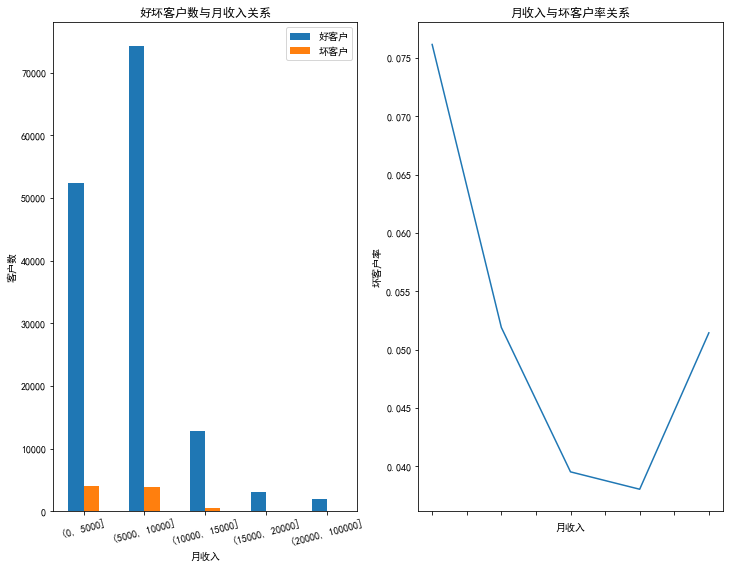

In [12]:
#单变量可视化                          
fig,ax = plt.subplots(1,2,figsize=(12,9))
df3[['好客户','坏客户']].plot(kind='bar',ax=ax[0])
ax[0].set_xticklabels(df3.index,rotation=15)
ax[0].set_ylabel('客户数')
ax[0].set_title('好坏客户数与月收入关系')
df3['坏客户率'].plot(ax=ax[1])
ax[1].set_ylabel('坏客户率')
ax[1].set_title('月收入与坏客户率关系')
plt.show()

In [13]:
cut_bins=[0,2,4,20]
family_cut=pd.cut(df1["家属数量"],cut_bins)
family_cut_grouped=df1["好坏客户"].groupby(family_cut).count().to_frame()
family_cut_grouped1=df1["好坏客户"].groupby(family_cut).sum().to_frame()
df4=pd.merge(family_cut_grouped,family_cut_grouped1,right_index=True,left_index=True)
df4.rename(columns={"好坏客户_x":"好客户","好坏客户_y":"坏客户"},inplace=True)
df4['坏客户率'] = df4["坏客户"] / df4["好客户"] 
df4.head()

,好客户,坏客户,坏客户率
家属数量,,,
"(0, 2]",44634,3036,0.068
"(2, 4]",11987,982,0.082
"(4, 20]",960,86,0.090


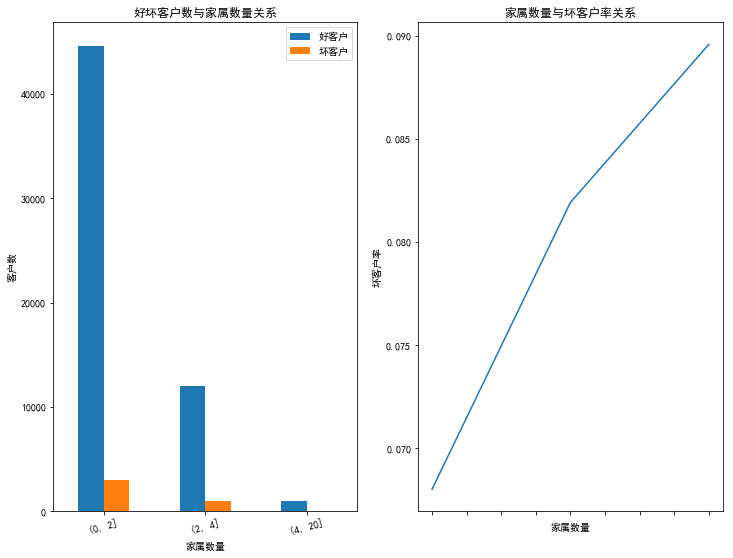

In [14]:
#单变量可视化                          
fig,ax = plt.subplots(1,2,figsize=(12,9))
df4[['好客户','坏客户']].plot(kind='bar',ax=ax[0])
ax[0].set_xticklabels(df4.index,rotation=15)
ax[0].set_ylabel('客户数')
ax[0].set_title('好坏客户数与家属数量关系')
df4['坏客户率'].plot(ax=ax[1])
ax[1].set_ylabel('坏客户率')
ax[1].set_title('家属数量与坏客户率关系')
plt.show()

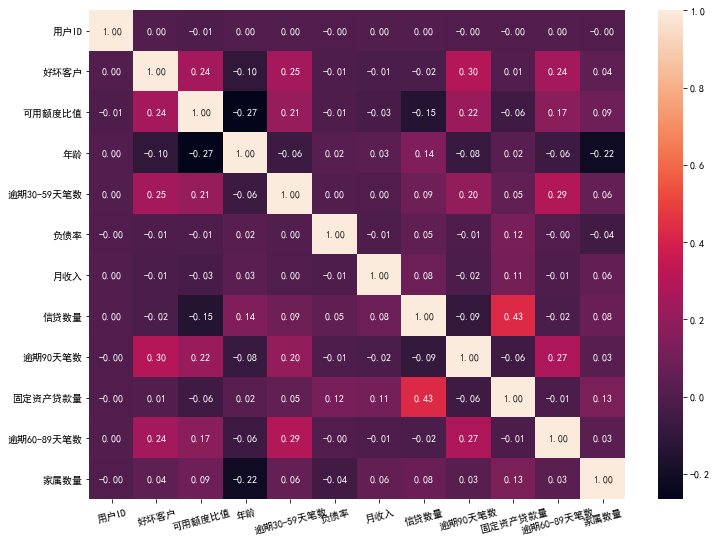

In [15]:
corr = df1.corr()
fig,ax = plt.subplots(1,1,figsize=(12,9))
sns.heatmap(corr,annot=True,fmt='.2f',ax=ax)
ax.set_xticklabels(corr.index,rotation=15)
plt.show()

In [16]:
#在建立风控评分卡中，一般会对特征进行分箱，以提高模型的稳定性和健壮性，消除了异常波动对评分结果的影响
cut1=pd.qcut(df1["可用额度比值"],4) #此为等频分箱，故每个箱子内数量一致
cut2=pd.qcut(df1["年龄"],8)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df1["逾期30-59天笔数"],bins3)
cut4=pd.qcut(df1["负债率"],3)
cut5=pd.qcut(df1["月收入"],4)
cut6=pd.qcut(df1["信贷数量"],4)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df1["逾期90天笔数"],bins7)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df1["固定资产贷款量"],bins8)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df1["逾期60-89天笔数"],bins9)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(df1["家属数量"],bins10)

In [80]:
goodbad = df1["好坏客户"].value_counts()
user0,user1 = goodbad[0],goodbad[1]
rate = user1 / user0

In [81]:
#定义woe计算函数 计算公式：woei = ln(Gi/Gtotal / Bi/Btotal) 表示每个分箱中好坏比
def compute_woe(cut):
    grouped=df1["好坏客户"].groupby(cut).value_counts().to_frame().unstack() 
    woe=np.log(grouped.iloc[:,1]/grouped.iloc[:,0]/rate)#计算每个分组的woe值
    return woe

In [82]:
cuts = [cut1,cut2,cut3,cut4,cut5,cut6,cut7,cut8,cut9,cut10]

In [83]:
cut_woe_dict = {f'cut{index+1}_woe':compute_woe(cuts[index]) for index in range(len(cuts))}

In [84]:
def compute_IV(cut,cut_woe):
    """
    对于好坏客户按照分箱统计，转为df，再将好坏类别索引从行转为列
    对于好坏各列分别除以对应的整体好坏人数 好除以好，坏除以坏，得到每个分箱中好坏人数占整体好坏人数的比例
    然后每组好坏比例与该组对应的woe值对应相乘，最后求和，所以优化为内积操作
    """
    group=df1["好坏客户"].groupby(cut).value_counts().to_frame().unstack() 
#   cut_IV=(group.iloc[:,1] / user1 - group.iloc[:,0] / user0).dot(cut_woe)  
    cut_IV=group.apply(lambda x: x[1]/user1 - x[0]/user0,axis=1).dot(cut_woe)
    return cut_IV
   

In [85]:
cut_iv_dict = {f"cut{index+1}_iv":compute_IV(cuts[index],cut_woe_dict[f'cut{index+1}_woe']) for index in range(len(cuts))}

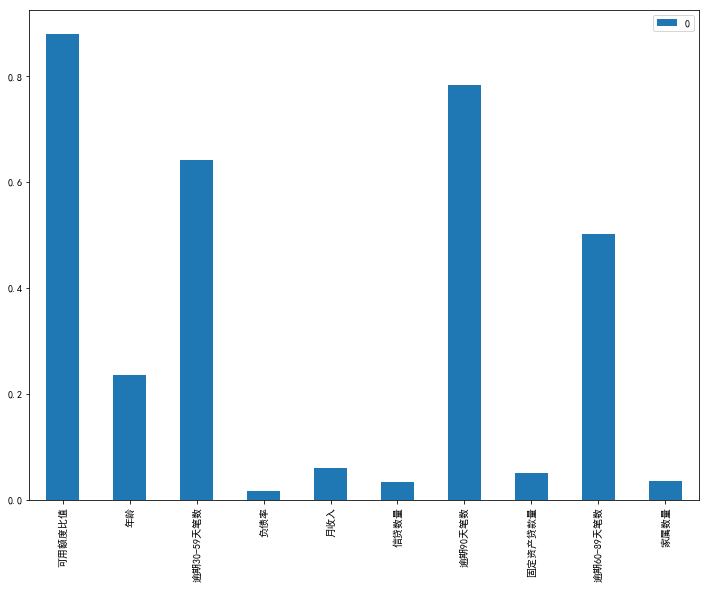

In [86]:
df_iv = pd.DataFrame(cut_iv_dict.values(),index=df1.columns[2:])
df_iv.plot(kind='bar',figsize=(12,9))
plt.show()                               

In [87]:
#定义一个替换函数
def replace_data(cut,cut_woe):
    cut_sort = sorted(cut.unique())  ##升序为了与分位数相对应，因为分位数也是先升序排列的
    mapDict = {cut:cut_woe for cut,cut_woe in zip(cut_sort,cut_woe.values)}    
    cut_replaced = cut.map(mapDict)    ##建立映射关系，完成替换工作
    return cut_replaced

In [88]:
df_new = pd.DataFrame()
cols = df1.columns[2:]
for col,cut,cutn_woe in zip(cols,cuts,cut_woe_dict):
    df_new[col] = replace_data(cut,cut_woe_dict[cutn_woe])
# df_new['可用额度比值']=replace_data(cut1,cut_woe_dict['cut1_woe'])
# df_new["年龄"]=replace_data(cut2,cut_woe_dict['cut2_woe'])
# df_new["逾期30-59天笔数"]=replace_data(cut3,cut_woe_dict['cut3_woe'])
# df_new["逾期90天笔数"]=replace_data(cut7,cut_woe_dict['cut7_woe'])
# df_new["逾期60-89天笔数"]=replace_data(cut9,cut_woe_dict['cut9_woe'])

In [89]:
df_new

,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1.049,0.244,1.715,0.159,-0.309,0.055,-0.346,0.676,-0.245,0.208
1,1.049,0.325,-0.476,-0.148,0.299,0.207,-0.346,0.188,-0.245,0.108
2,1.049,0.325,0.909,-0.148,0.299,0.207,1.997,0.188,-0.245,-0.153
3,-0.254,0.522,-0.476,-0.148,0.299,0.207,-0.346,0.188,-0.245,-0.153
4,1.049,0.178,0.909,-0.148,-0.309,-0.255,-0.346,-0.235,-0.245,-0.153
...,...,...,...,...,...,...,...,...,...,...
149995,-1.161,-1.049,-0.476,-0.148,0.299,0.207,-0.346,-0.235,-0.245,-0.153
149996,-0.254,0.244,-0.476,0.159,0.112,0.207,-0.346,-0.235,-0.245,0.208
149997,-0.254,-0.384,-0.476,0.159,-0.207,0.055,-0.346,-0.235,-0.245,-0.153
149998,-1.203,0.522,-0.476,-0.148,0.112,0.207,-0.346,0.188,-0.245,-0.153


In [90]:
df_new.head()

,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1.049,0.244,1.715,0.159,-0.309,0.055,-0.346,0.676,-0.245,0.208
1,1.049,0.325,-0.476,-0.148,0.299,0.207,-0.346,0.188,-0.245,0.108
2,1.049,0.325,0.909,-0.148,0.299,0.207,1.997,0.188,-0.245,-0.153
3,-0.254,0.522,-0.476,-0.148,0.299,0.207,-0.346,0.188,-0.245,-0.153
4,1.049,0.178,0.909,-0.148,-0.309,-0.255,-0.346,-0.235,-0.245,-0.153


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [92]:
x=df_new
y=df1.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [93]:
#模型训练
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print("测试成绩:{}".format(clf.score(x_test,y_test)))

D:\app\conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


测试成绩:0.9427407053252282


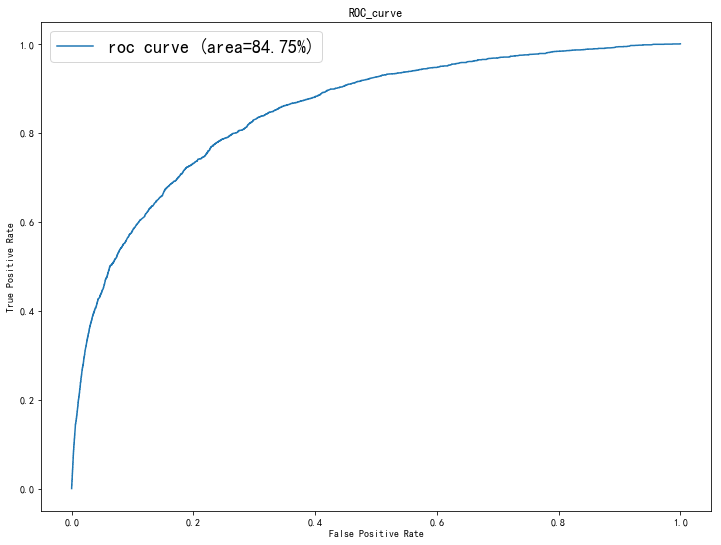

In [94]:
y_pred_prob=clf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
roc_score = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(12,9))
plt.plot(fpr,tpr,label=f"roc curve (area={roc_score:.2%})")
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(loc="best",fontsize=18)
plt.title('ROC_curve')
plt.show()

In [95]:
coef = clf.coef_
intercept = clf.intercept_
b = 20 / np.log(2)
a = 600 - b * np.log(20) 

In [96]:
#参与建模的解释变量集V
var_coef_df = pd.DataFrame(dict(var_name=df_new.columns,coef = coef.flatten()))

In [97]:
var_bins_woe_df = pd.DataFrame()
for var in cut_woe_dict:
    var_series = cut_woe_dict[var]
    tmp = pd.DataFrame(dict(var_name=var_series.index.name,split_bin=var_series.index,woe=var_series.values))
    var_bins_woe_df = pd.concat([var_bins_woe_df,tmp],axis=0)

In [98]:
var_bins_woe_coef_df = pd.merge(var_bins_woe_df,var_coef_df,on='var_name',how='inner')
var_bins_woe_coef_df['factor'] = b
var_bins_woe_coef_df['woeScore'] = var_bins_woe_coef_df.apply(lambda x:-x['woe']*x['coef']*x['factor'],axis=1)

In [99]:
var_bins_woe_coef_df

,var_name,split_bin,woe,coef,factor,woeScore
0,可用额度比值,"(-0.001, 0.0285]",-1.203,0.628,28.854,21.791
1,可用额度比值,"(0.0285, 0.144]",-1.161,0.628,28.854,21.042
2,可用额度比值,"(0.144, 0.517]",-0.254,0.628,28.854,4.595
3,可用额度比值,"(0.517, 1.0]",1.049,0.628,28.854,-19.015
4,年龄,"(20.999, 35.0]",0.522,0.434,28.854,-6.536
5,年龄,"(35.0, 42.0]",0.325,0.434,28.854,-4.072
6,年龄,"(42.0, 47.0]",0.244,0.434,28.854,-3.053
7,年龄,"(47.0, 52.0]",0.178,0.434,28.854,-2.222
8,年龄,"(52.0, 57.0]",-0.025,0.434,28.854,0.315
9,年龄,"(57.0, 63.0]",-0.384,0.434,28.854,4.813


In [100]:
baseScore = a - b*intercept
# var_bins_woe_coef_df.loc[0,:] = ['基础分','-','-','-','-',baseScore]

In [101]:
score_df = df1.copy()

In [102]:
score_df = score_df.drop(['用户ID','好坏客户'],axis=1)
score_df.head()

,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,0.766,45,2,0.803,9120.0,13,0,6,0,2.0
1,0.957,40,0,0.122,2600.0,4,0,0,0,1.0
2,0.658,38,1,0.085,3042.0,2,1,0,0,0.0
3,0.234,30,0,0.036,3300.0,5,0,0,0,0.0
4,0.907,49,1,0.025,63588.0,7,0,1,0,0.0


In [110]:
def match_woeScore(df,data):
    tmpScore = 0.0
    for i in range(len(data)):
        col = cols[i]
        tmpv = df.loc[df['var_name']==col,'split_bin']
        vindex = list(filter(lambda x:data[i] in x,tmpv))
        tmpwoeScore = df.query("var_name == @col and split_bin == @vindex")['woeScore'].values
        tmpScore +=  tmpwoeScore[0]             
        print(data[i],vindex[0],tmpwoeScore,sep='\t')
    return tmpScore+baseScore
cols = score_df.columns
test_data = [.756,39,1,0.2,4100,5,1,2,0,1]
test_score = match_woeScore(var_bins_woe_coef_df,test_data)
test_score

0.756	(0.517, 1.0]	[-19.01456841]
39	(35.0, 42.0]	[-4.07218885]
1	(0, 1]	[-14.83811986]
0.2	(-0.001, 0.239]	[5.92507327]
4100	(3958.0, 6649.5]	[-1.82931556]
5	(-0.001, 5.0]	[-1.47265947]
1	(0, 1]	[-32.17338443]
2	(1, 2]	[3.21364152]
0	(-1, 0]	[2.97265004]
1	(0, 1]	[-1.18286638]


array([530.37084792])